In [13]:
from quantum_gates.utilities import load_config
from pulse_opt.integrals.utilities import load_table_from_pickle
import pandas as pd
from pulse_opt.pulses.combined_factory import CombinedFactory
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["text.usetex"] = False

def main(run: str, add_default: bool=True):
    """ Executes the visualization.
    """
    # Load data
    config = load_config(f"integrals/{run}.json")
    content = config["content"]
    df = load_table_from_pickle(run=run)
    
    return df

In [3]:
df = main("fourier_extended_constrained")

Loaded configuration integrals/fourier_extended_constrained.json.


In [4]:
df1 = df.loc[round(df['args.theta'],2) == 3.14]
print(df1.index[df1['results.fun'] == df1['results.fun'].min()])
print(df1['results.fun'].min())

Index([19], dtype='int64')
1.017972024790564


In [5]:
data = df.iloc[[19]]

In [6]:
data

,config.name,config.description,config.content.factory,config.content.factory_path,config.content.factory_args,config.content.ansatz_name,config.content.loss,config.content.loss_path,config.content.variable_args.shift,config.content.variable_args.n,...,results.x,results.optimality,results.constr_violation,results.execution_time,results.tr_radius,results.constr_penalty,results.status,results.niter,results.success,results.message
19,fourier_extended_constrained,Configuration to test the Fourier Pulses with ...,FourierFactory,pulse_opt.pulses.fourier_factory,"[shift, n, has_vanishing_endpoints]",Fourier series,FourierLoss,pulse_opt.integrals.losses,"[0.0, 0.5, 1.0]","[2, 4, 8, 16, 24, 32]",...,"[-1.1413282911852713, -1.7518183168840757, 2.2...",0.000064,2.427498e-10,1218.248937,6.410357,1.0,1,90,True,`gtol` termination condition is satisfied.


In [8]:
# Setup factory
cf = CombinedFactory()

for index, row in data.iterrows():
    pulse = cf(row)

In [9]:
waveform = pulse.get_pulse()

def waveform_new(s):
    
    a = waveform(s/160)
    
    return a

In [10]:
x = np.linspace(0.0, 160.0, 160)
y = np.array([np.pi/(4*160)*waveform_new(s) for s in x])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

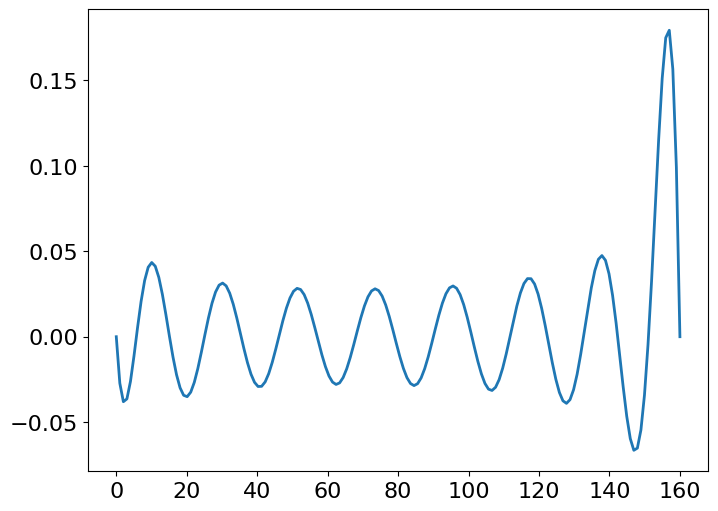

In [14]:
plt.plot(x,y)

In [15]:
from qiskit.pulse import Waveform

In [16]:
drive_pulse = Waveform(y, name = 'Fourier_pulse', limit_amplitude = False)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

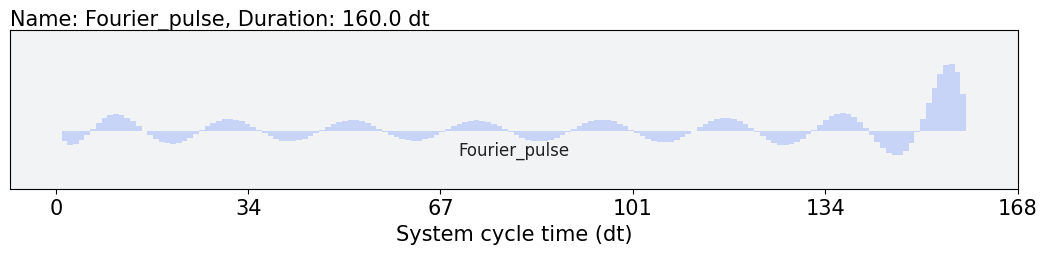

In [17]:
drive_pulse.draw()

In [ ]:
from quantum_gates.utilities import fix_counts
import numpy as np
from numpy import pi, array,sqrt,exp
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile
from numpy import savetxt,loadtxt
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
from qiskit import pulse

In [23]:
def compute_Hellinger_distance(p_ng: float, p_real: float, nqubits: int) -> float:
    """ Given two distributions as array, returns the Hellinger distance.
    """
    dh_ng = (np.sqrt(p_real)-np.sqrt(p_ng))**2
    h_ng = 0

    for i in range(2**nqubits):
        h_ng = h_ng + dh_ng[i]

    h_ng = (1/np.sqrt(2)) * np.sqrt(h_ng)
    return h_ng  

In [27]:
from qiskit_ibm_provider import IBMProvider

Token = 'eae05ffde7654f27d38c30b5a10b781ce7331cbd7f668dfe5ea5b775ab70a38ea0c08427378df7de6fe5b6769df6ca4005dfb5d40fed820132a738b45d378039'

# IBMProvider.save_account(token=Token)

provider = IBMProvider(instance='ibm-q-research-2/uni-trieste-1/main')
backend = provider.get_backend("ibmq_jackarta")

RequestsApiError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [17]:
backend = provider.get_backend("ibmq_quito")

In [22]:
def X_circ(depth):
    circ = QuantumCircuit(1,1)
    for i in range(0,depth):
        circ.x(0)
        
        circ.barrier(range(1))
    
    circ.measure(range(1),range(1))
    return circ

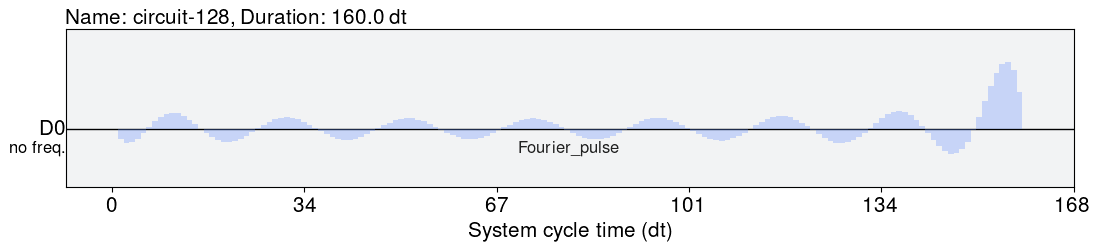

In [44]:
from qiskit.compiler import schedule
sched_circ = schedule(circ,backend)

sched_circ.draw()

In [52]:
#RUN ON ACTUAL HARDWARE

shots = 1000
qc_list = []
qubits_layout = [0,1]

r00_device = []
r11_device = []

for i in range(0,100):
    qc = X_circ(i)
    qc.add_calibration('x', [0], x_q0)
    #qc = transpile(qc, backend, scheduling_method = 'asap',seed_transpiler=42)
    qc_list.append(qc)


job = backend.run(qc_list, shots=shots)
result = job.result()

for i in range(0,100):
    
    counts_0 = result.get_counts(qc_list[i])
    
    counts = fix_counts(counts_0,1)
   
    p_real = [counts[j][1]/shots for j in range(0,2)]
    
    r00_device.append(p_real[0])
    r11_device.append(p_real[1])
    
savetxt('r00_X_DEVICE_1.txt', r00_device)
savetxt('r11_X_DEVICE_1.txt', r11_device)

In [107]:
us = 1.0e-6 # Microseconds
drive_sigma_sec = 0.015 * us                           # This determines the actual width of the gaussian
drive_duration_sec = drive_sigma_sec * 8
granularity = 16
amplitude = 0.09342650821167793

In [108]:
def get_closest_multiple_of(value, base_number):
    return int(value + base_number/2) - (int(value + base_number/2) % base_number)

In [109]:
def get_closest_multiple_of_16(num):
    return get_closest_multiple_of(num, granularity)

In [110]:
with pulse.build(backend, name='x-gate') as x_q0:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(0)
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              amp=amplitude,
                              sigma=drive_sigma,
                              name='pi_pulse'), drive_chan)

In [111]:
drive_pulse = pulse.Gaussian(duration=drive_duration,
                              amp=amplitude,
                              sigma=drive_sigma,
                              name='pi_pulse')

In [112]:
arr = drive_pulse.get_waveform().samples

In [113]:
sum(arr)

(15.6809371114162+9.6013222242281e-16j)

In [82]:
print(drive_duration)

544


In [83]:
def Gaussian_Waveform(x):
    mu = drive_duration/2
    e = amplitude *np.exp(((x-mu)/2*drive_sigma)**2)
    return e

In [84]:
x = np.linspace(0.0, drive_duration, drive_duration)
y = np.array([Gaussian_Waveform(s) for s in x])

/var/folders/5l/5mf41b7n127_8z4y8dfjf8lm0000gr/T/ipykernel_791/1214589588.py:3: RuntimeWarning: overflow encountered in exp
  e = amplitude *np.exp(((x-mu)/2*drive_sigma)**2)


In [85]:
sum(y)

inf

In [61]:
68*8

544

In [65]:
0.015*8 *us/(35*10**-9)

3.428571428571428

In [103]:
area = amplitude * np.sqrt(2*np.pi*drive_sigma**2)

In [105]:
area/np.pi

4.994419087611936